In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

# credits https://www.kaggle.com/archaeocharlie/digit-recognizer/a-beginner-s-approach-to-classification

In [2]:
data_0 = pd.read_csv('train.csv')
labels_0 = data_0.iloc[:5000,:1]
pixels_0 = data_0.iloc[:5000,1:]
pixels_train_0, pixels_test_0, \
labels_train_0, labels_test_0 = train_test_split(pixels_0, labels_0, train_size=0.7, random_state = 0)

In [3]:
pixels_train_0.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


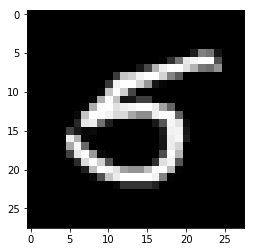

In [4]:
i = 1000
img = pixels_train_0.iloc[i].as_matrix().reshape(28,28)
plt.imshow(img,cmap='gray')

In [5]:
test = pd.DataFrame(img)
pd.options.display.max_columns = 999
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,128,115,22,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,48,115,232,245,254,255,82,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,73,180,238,254,252,224,179,119,110,148,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,59,197,209,243,254,254,211,131,90,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,56,244,254,254,213,151,22,5,0,0,0,0,0,0,0,0,0,0


In [6]:
pixels_test_0 = pixels_test_0 / 255
pixels_train_0 = pixels_train_0 / 255

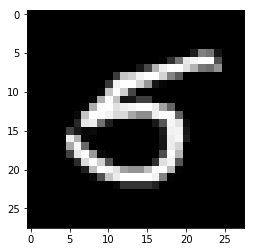

In [7]:
i = 1000
img = pixels_train_0.iloc[i].as_matrix().reshape(28,28)
plt.imshow(img,cmap='gray')

In [8]:
clf = svm.SVC(C=0.05, kernel='linear')
clf.fit(pixels_train_0, labels_train_0.values.ravel())
clf.score(pixels_test_0,labels_test_0)

0.91266666666666663

In [39]:
x_range = np.linspace(20,30,10)
results = []
for value in x_range:
    clf = svm.SVC(C=value, kernel='rbf')
    clf.fit(pixels_train_0, labels_train_0.values.ravel())
    results.append([value, clf.score(pixels_test_0,labels_test_0)])

In [40]:
results

[[20.0, 0.91800000000000004],
 [21.111111111111111, 0.91866666666666663],
 [22.222222222222221, 0.91866666666666663],
 [23.333333333333332, 0.92000000000000004],
 [24.444444444444443, 0.92066666666666663],
 [25.555555555555557, 0.92000000000000004],
 [26.666666666666668, 0.92000000000000004],
 [27.777777777777779, 0.92066666666666663],
 [28.888888888888889, 0.92066666666666663],
 [30.0, 0.92066666666666663]]

In [41]:
clf

SVC(C=30.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)